## Plot results

In [1]:
#set which GPU you wanna use
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
# os.environ["CUDA_VISIBLE_DEVICES"]='2' 

In [2]:
def build_results_df(folders):
    ''' Args-
        folders:  list of folders to look for the results json file in. Ex: ["results_*/", "backup/results_*/"] '''
    df = pd.DataFrame()
    for folder in folders:
        for jsonfile in glob(folder+"/scores_*.json"):
            row = pd.read_json(jsonfile, typ='series')
            # get the name of the model and add to df
            name = jsonfile.split("/")[-2].replace("results_","")
            row['model']=name
            df = df.append(row, ignore_index=True)
    df = df.set_index('model').sort_index()
    return df

def plot_results_df(df):
    # check if all columns exists, if not print warning and add column 
    for c in ["MSE_mean", "MSE_std", "MSE_mean_prev_frame_copy", "MSE_std_prev_frame_copy",
    "MAE_mean", "MAE_std", "MAE_mean_prev_frame_copy", "MAE_std_prev_frame_copy",
    "SSIM_mean","SSIM_mean_prev_frame_copy", "PRNS_mean", "PRNS_mean_prev_frame_copy",
              "Sharpness_mean", "Sharpness_mean_prev_frame_copy"]:
        if(c not in df.columns):
            print("WARNING:'{}' doesnot exist in any of the result*.json files".format(c))
            df[c] = 0
    
    f, axs = plt.subplots(5,2, figsize=(15,15), sharex=True)
    # 1) plot the MSE raw scores
    df.plot.bar(y=["MSE_mean", "MSE_mean_prev_frame_copy"], ax=axs[0,0]
                , yerr=df[["MSE_std", "MSE_std_prev_frame_copy"]].rename(columns={"MSE_std":"MSE_mean", "MSE_std_prev_frame_copy":"MSE_mean_prev_frame_copy"})
                , title="Mean square error", grid=True)
    axs[0,0].legend(["model MSE", "prev-frame-copy MSE"])
    
    # plot the MSE improvements
    (results["MSE_mean_prev_frame_copy"] - results["MSE_mean"]).plot(
        ax=axs[0,1], title="MSE improvement", grid=True, kind="bar")
    axs[0,1].axhline()
    
    # 2) plot the MAE raw scores
    df.plot.bar(y=["MAE_mean", "MAE_mean_prev_frame_copy"], ax=axs[1,0]
                , yerr=df[["MAE_std", "MAE_std_prev_frame_copy"]].rename(columns={"MAE_std":"MAE_mean", "MAE_std_prev_frame_copy":"MAE_mean_prev_frame_copy"})
                , title="Mean absolute error", grid=True)
    axs[1,0].legend(["model MAE", "prev-frame-copy MAE"])
    
    # plot the MSE improvements
    (results["MAE_mean_prev_frame_copy"] - results["MAE_mean"]).plot(
        ax=axs[1,1], title="MAE improvement", grid=True, kind="bar")
    axs[1,1].axhline()

    # 3) plot the SSIM scores
    df.plot.bar(y=["SSIM_mean", "SSIM_mean_prev_frame_copy"], ax=axs[2,0]
                , title="SSIM", grid=True)
    axs[2,0].legend(["model SSIM", "prev-frame-copy SSIM"])
    (results["SSIM_mean"] - results["SSIM_mean_prev_frame_copy"]).plot(
        ax=axs[2,1], title="SSIM improvement", grid=True, kind="bar")
    axs[2,1].axhline()

    # 4) plot the SSIM scores
    df.plot.bar(y=["PRNS_mean", "PRNS_mean_prev_frame_copy"], ax=axs[3,0]
                , title="PSNR", grid=True)
    axs[3,0].legend(["model PSNR", "prev-frame-copy PSNR"])
    (results["PRNS_mean"] - results["PRNS_mean_prev_frame_copy"]).plot(
        ax=axs[3,1], title="PSNR improvement", grid=True, kind="bar")
    axs[3,1].axhline()

    # 5) plot the sharpness
    df.plot.bar(y=["Sharpness_mean", "Sharpness_mean_prev_frame_copy"], ax=axs[4,0]
                , title="Sharpness", grid=True)
    axs[4,0].legend(["model Sharpness", "prev-frame-copy Sharpness"])
    (results["Sharpness_mean"] - results["Sharpness_mean_prev_frame_copy"]).plot(
        ax=axs[4,1], title="Sharpness improvement", grid=True, kind="bar")
    axs[4,1].axhline()

    
    plt.tight_layout()    

In [3]:
results = build_results_df(["prednet-smth-smth/results_*/"])#, "prednet-smth-smth/backup/results_*/"
display(results)

,MAE_mean,MAE_mean_prev_frame_copy,MAE_std,MAE_std_prev_frame_copy,MSE_mean,MSE_mean_prev_frame_copy,MSE_std,MSE_std_prev_frame_copy,PRNS_mean,PRNS_mean_prev_frame_copy,SSIM_mean,SSIM_mean_prev_frame_copy,Sharpness_mean,Sharpness_mean_prev_frame_copy
model,,,,,,,,,,,,,,
fps12_l4_img32_48_450k,NaN,NaN,NaN,NaN,0.005965,0.008671,0.000694,0.001065,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l4_img48_56_450k,NaN,NaN,NaN,NaN,0.005977,0.009166,0.000774,0.001247,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l5_img48_80_750k_p5m,NaN,NaN,NaN,NaN,0.005386,0.008478,0.000630,0.000968,25.907493,24.409018,0.863738,0.828476,27.899784,36.553362
fps12_l5_img48_80_900k_p11m,0.034508,0.039372,0.002444,0.003004,0.005526,0.008486,0.000637,0.001016,25.715538,24.417400,0.860200,0.828853,27.814926,36.556676
fps12_l5_lall_img48_80_750k_p5m,0.036838,0.039481,0.002747,0.003118,0.006504,0.008507,0.000752,0.001015,25.261958,24.405437,0.845610,0.828276,28.106207,36.553473
fps12_l6_img64_96_750k_p6m,0.034135,0.040177,0.002373,0.002936,0.005456,0.008717,0.000630,0.001003,25.830234,24.302378,0.859607,0.822311,26.406756,35.509561
fps12_l6_img96_160_750k_p7m,0.031733,0.039442,0.002946,0.003926,0.004924,0.008486,0.000756,0.001311,26.376134,24.384091,0.870118,0.826817,21.917274,32.076141
fps12_l7_img128_192_900k_p6m,0.033814,0.040091,0.004205,0.005281,0.005439,0.008691,0.001111,0.001728,25.947826,24.293649,0.863937,0.827733,20.505083,30.805551
fps6_l4_img48_56_750k,NaN,NaN,NaN,NaN,0.011187,0.016169,0.001248,0.001884,22.280338,NaN,0.766937,NaN,26.967813,NaN


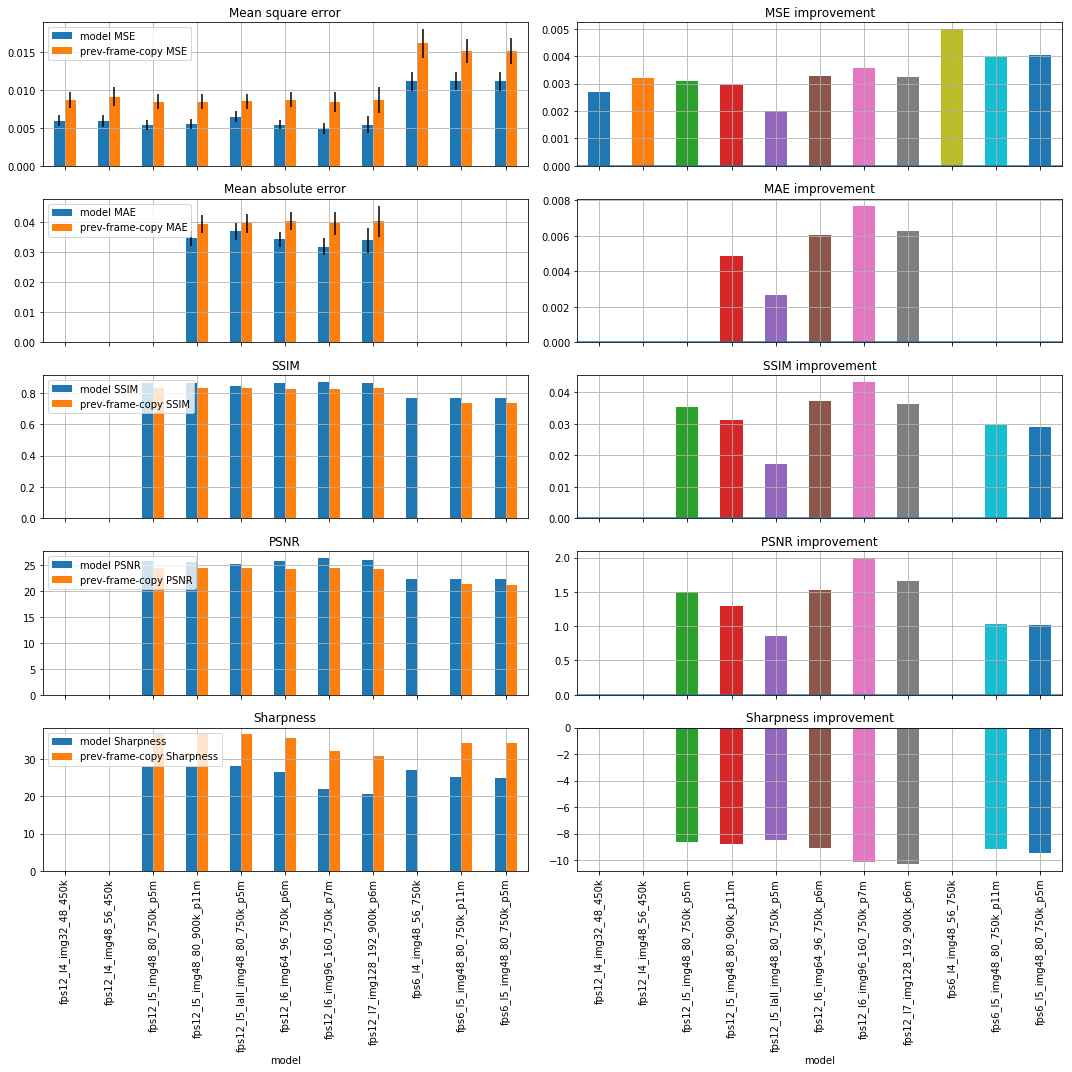

In [4]:
plot_results_df(results)

1. Edit fixes issues in the metrics  
  a. Sharpness implementation recheck    
2. Vageesh : add Extrapolation-based metric in eval mode
3. Vageesh : Collect all trained models in one directory and write a bash script to re-run the eval for all models in the directory (--test_samples 5000) 
4. Edit/Vageesh : Select the best metric by visual comparing predicted image qualities